# Kaggle House Prices: Advanced Regression Techniques
Paulo Martinez, 5/10/18

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [142]:
import seaborn as sns
sns.set(style = 'darkgrid')

In [296]:
from sklearn import linear_model

## ✅ Inspect Columns
- find the ones with high correlation to SalePrice
- look out for sentinel or default values
    - don't drop them, because the model can use them to determine high variability in price according to them

## Reclassify Columns
- Some numerical Columns are actually categorical

## Handle Categorical values with value counts that are too small
- if the data set is too small it might generate an inaccurate prediction

Mary recommends:
1. try a sklearn.linear_model
2. sklearn.ensemble.RandomForestRegressor
3. try with xgboost.XGBRegressor
    - which is apparently the one that generates the most wins

## load data

In [229]:
train_df = pd.read_csv('data/train.csv')

In [180]:
test_df = pd.read_csv('data/test.csv')
baseline_submission = pd.read_csv('data/sample_submission.csv')

## superficial analysis

In [230]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [231]:
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [232]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


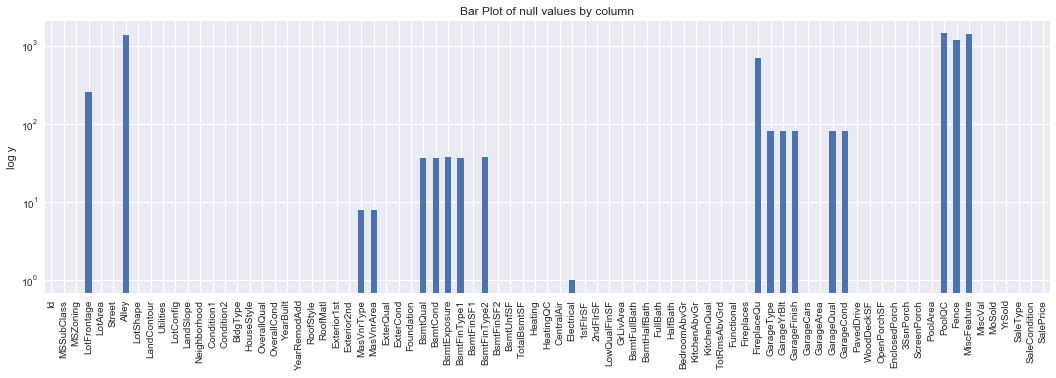

In [233]:
train_df.isnull().sum().plot(kind = 'bar', figsize = (18, 5), log = True)
plt.title('Bar Plot of null values by column')
plt.ylabel('log y')
plt.grid(color = 'w')                        
plt.show()

In [190]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [234]:
types_df = train_df.dtypes.to_frame('type')

In [235]:
types_df.head()

,type
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64


In [236]:
numeric_cols = types_df[(types_df.type == 'int64') | (types_df.type == 'float64')].index.tolist()
cat_cols = types_df[types_df.type == 'object'].index.tolist()

In [237]:
numeric_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [238]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## visualize relationship of categorical columns
We should drop columns with sparse relevance
For each column, we should drop the values that appear less than x times (less than 10)

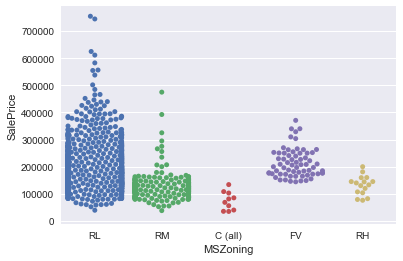

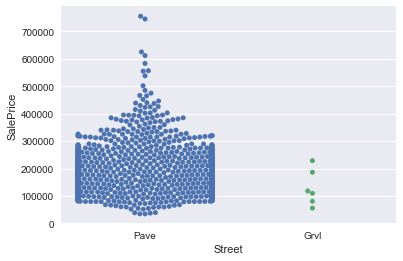

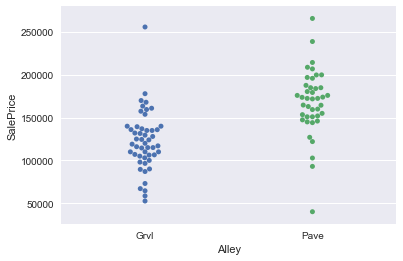

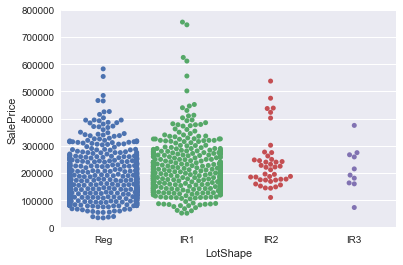

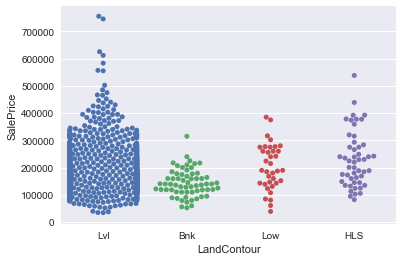

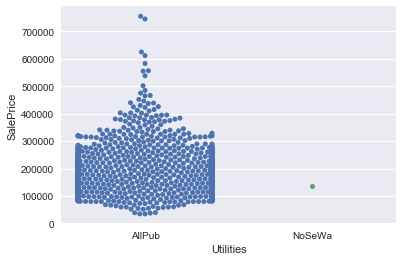

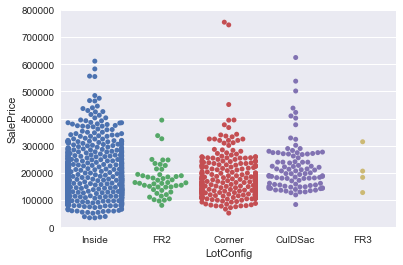

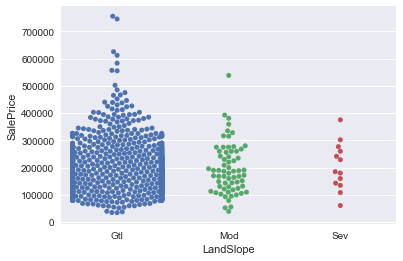

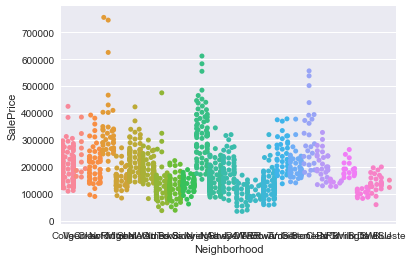

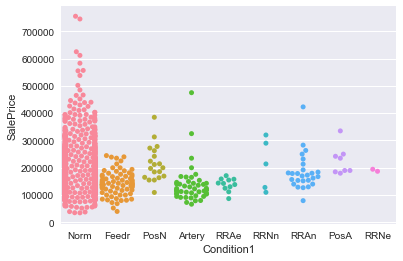

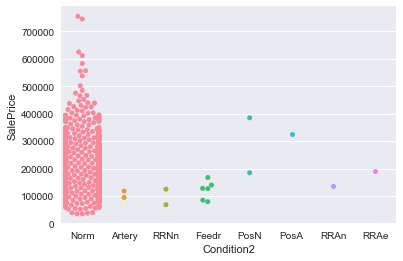

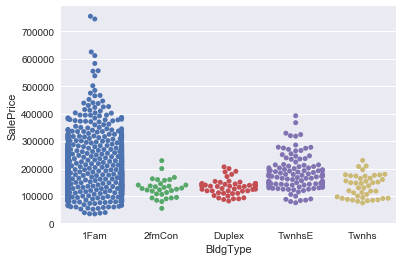

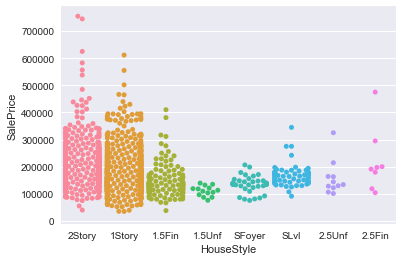

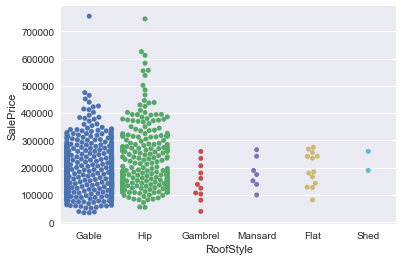

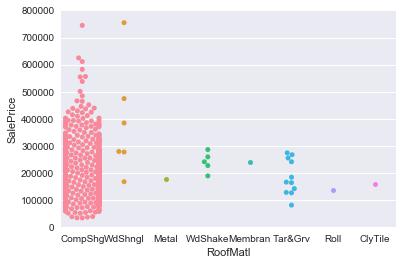

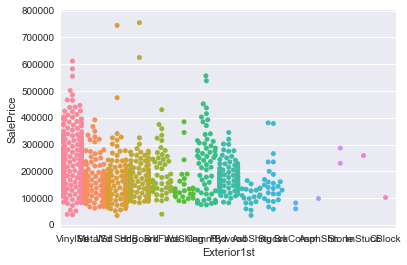

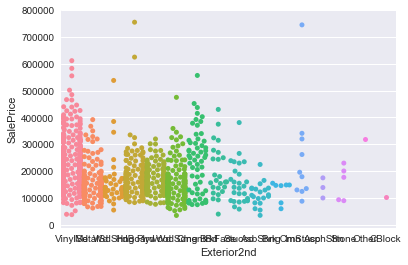

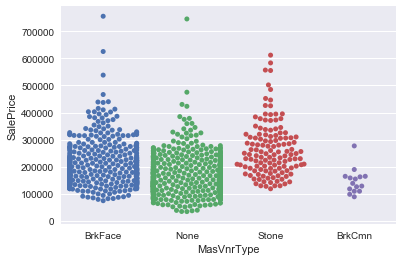

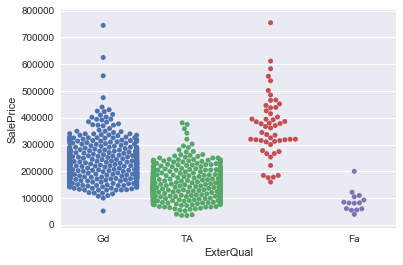

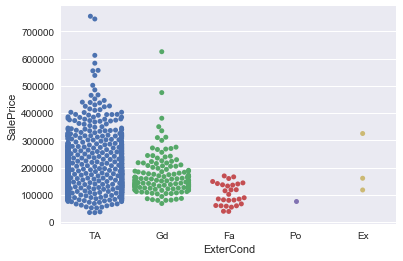

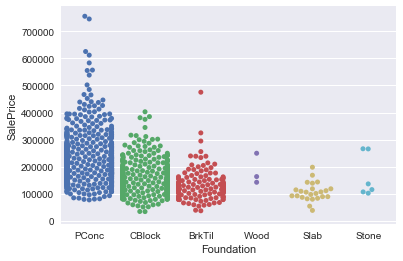

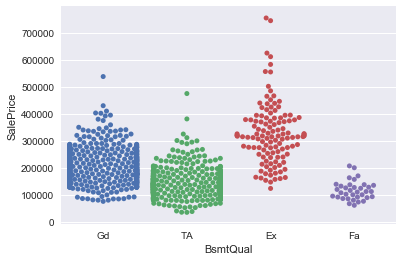

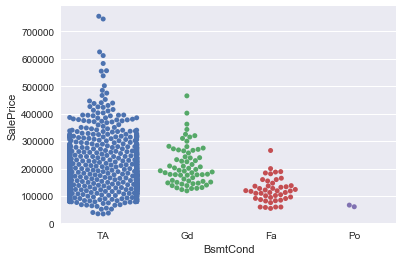

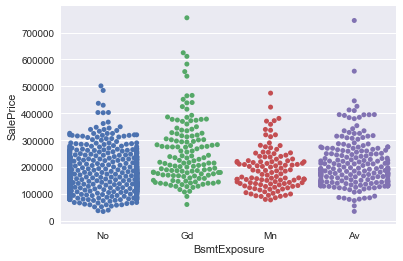

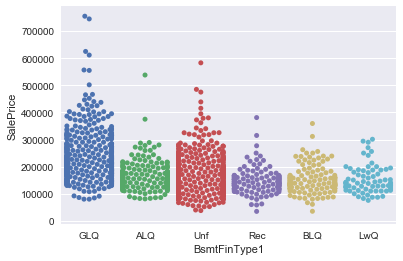

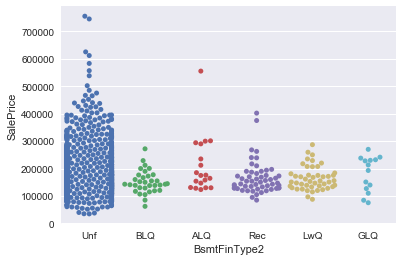

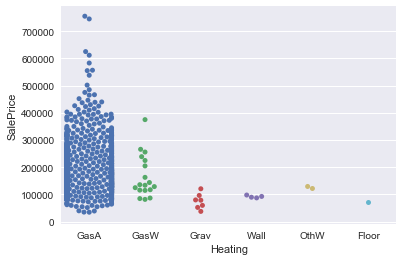

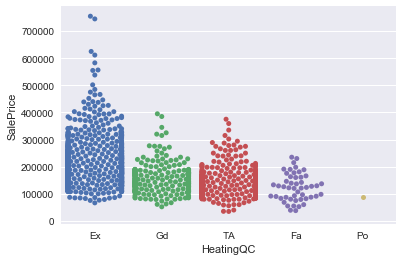

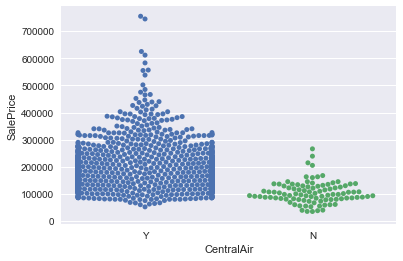

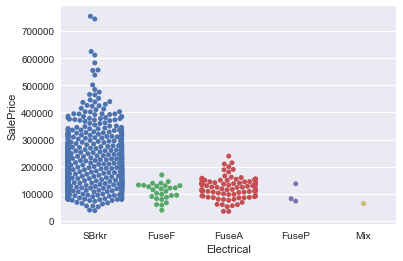

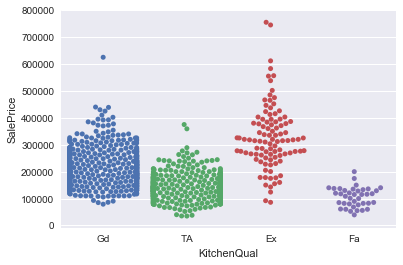

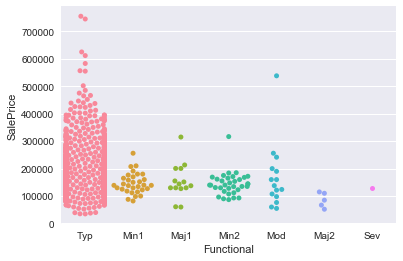

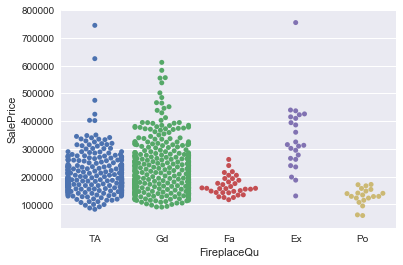

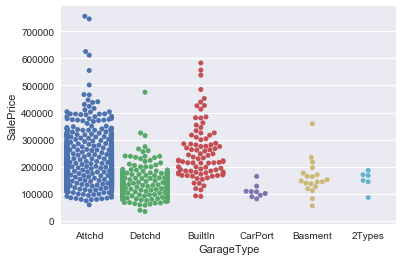

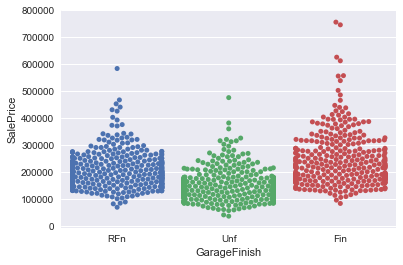

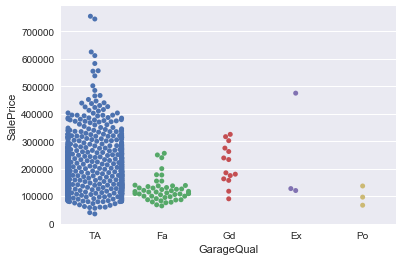

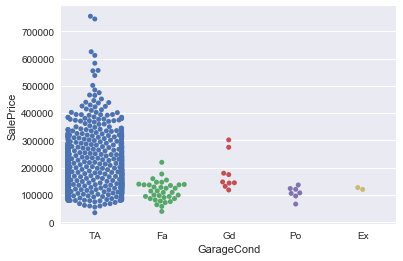

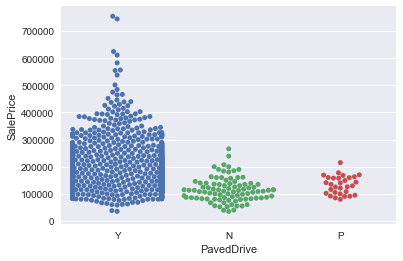

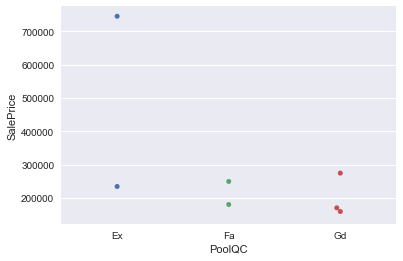

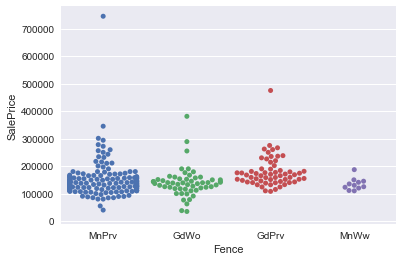

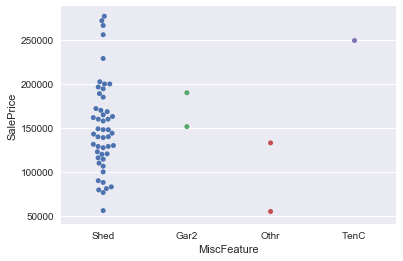

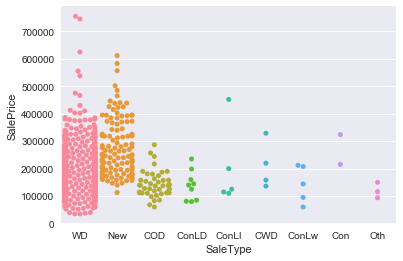

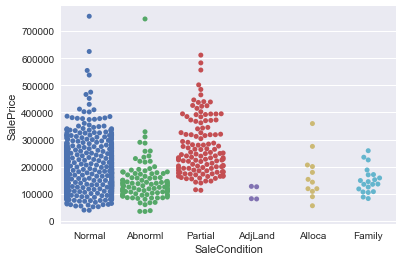

In [222]:
for col in cat_cols:
    sns.swarmplot(x = col, y = 'SalePrice', data = train_df)
    plt.show()

## visualize numerical columns

We should reclassify some numerical columns which are actually categorical. i.e. OverallQual

                 ---------------- ['Id', 'MSSubClass', 'LotFrontage'] ---------------------


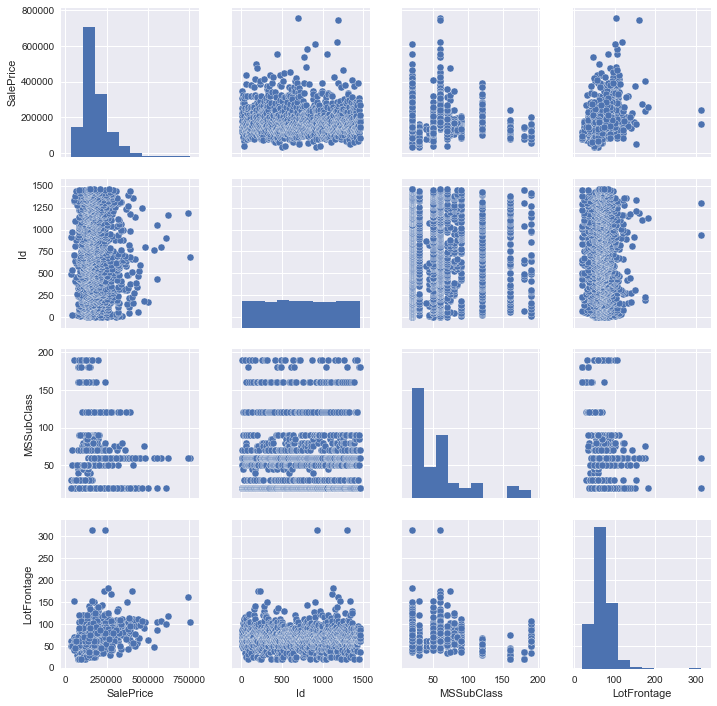

                 ---------------- ['LotArea', 'OverallQual', 'OverallCond'] ---------------------


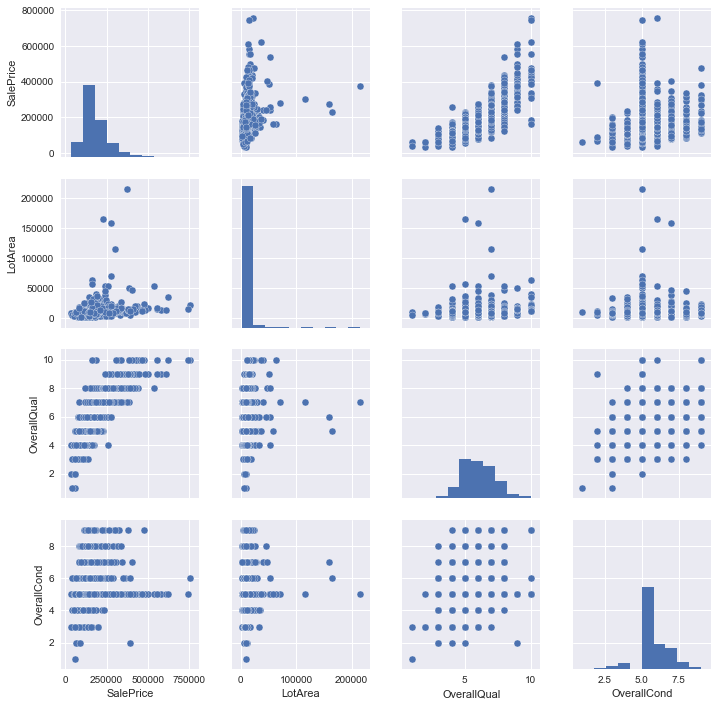

                 ---------------- ['YearBuilt', 'YearRemodAdd', 'MasVnrArea'] ---------------------


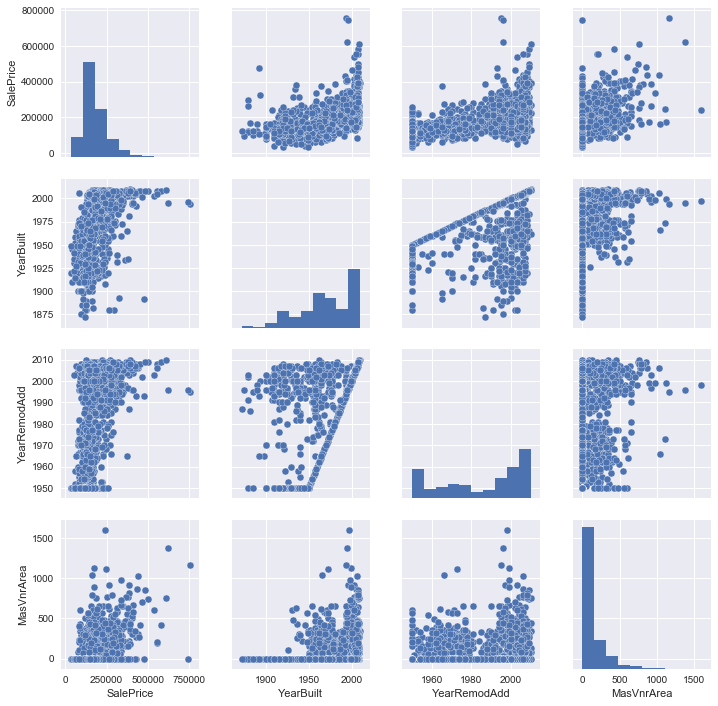

                 ---------------- ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'] ---------------------


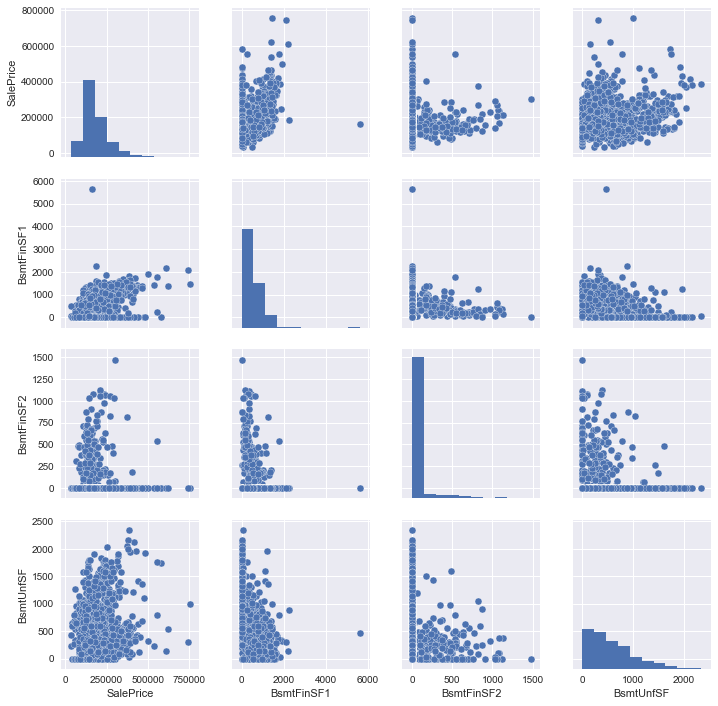

                 ---------------- ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'] ---------------------


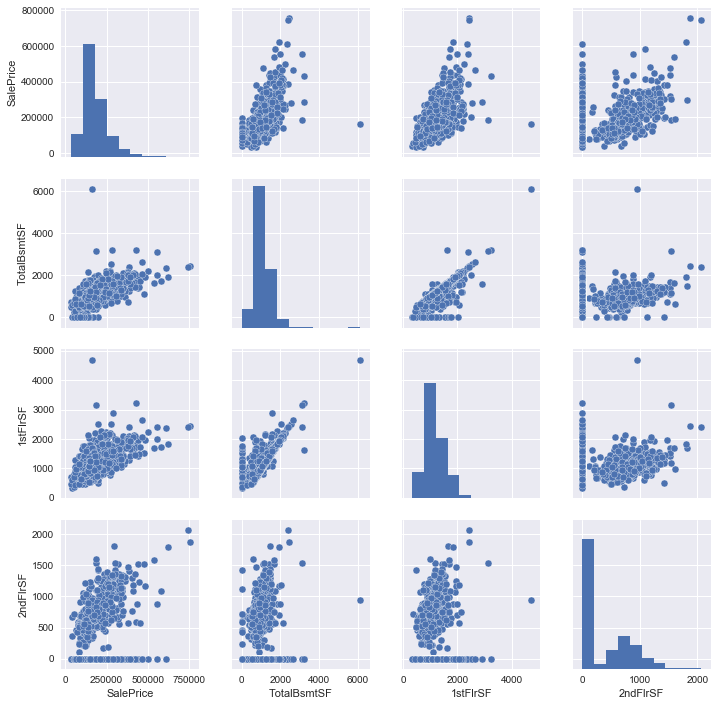

                 ---------------- ['LowQualFinSF', 'GrLivArea', 'BsmtFullBath'] ---------------------


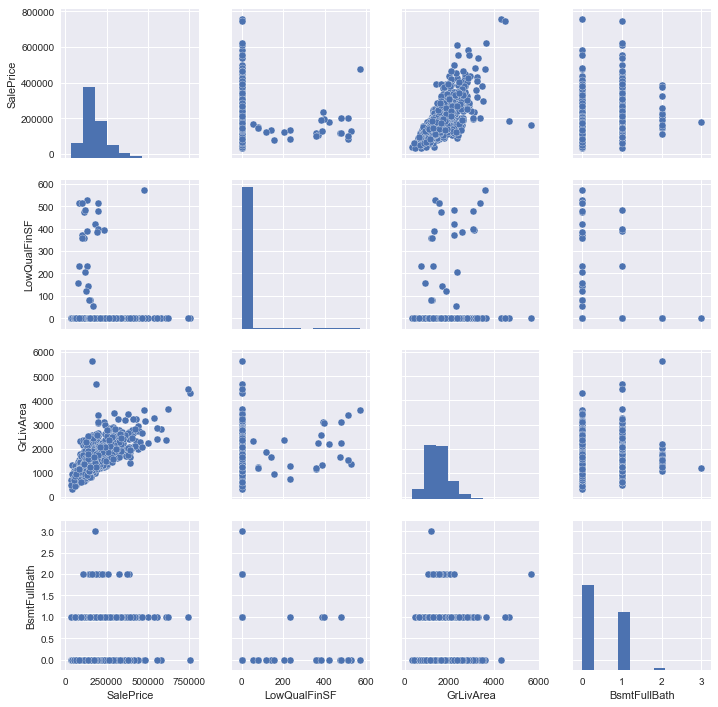

                 ---------------- ['BsmtHalfBath', 'FullBath', 'HalfBath'] ---------------------


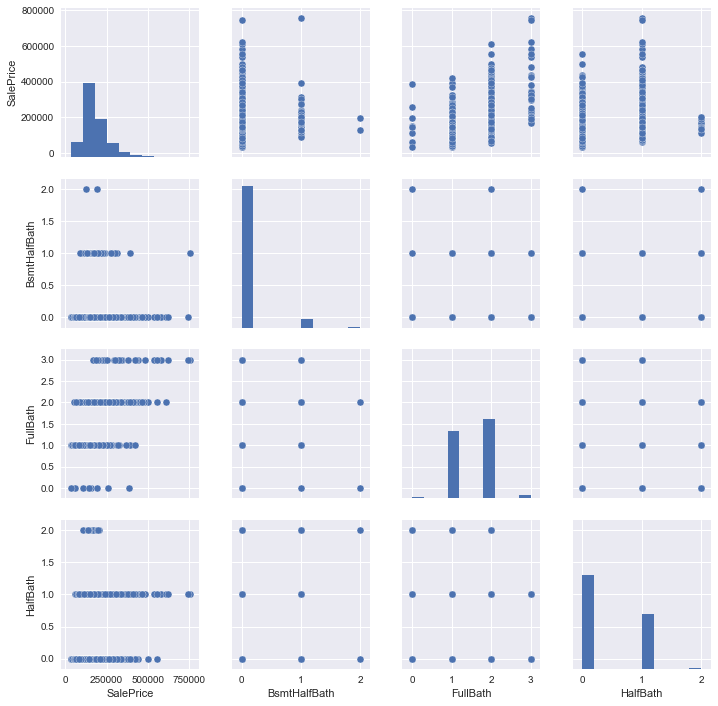

                 ---------------- ['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'] ---------------------


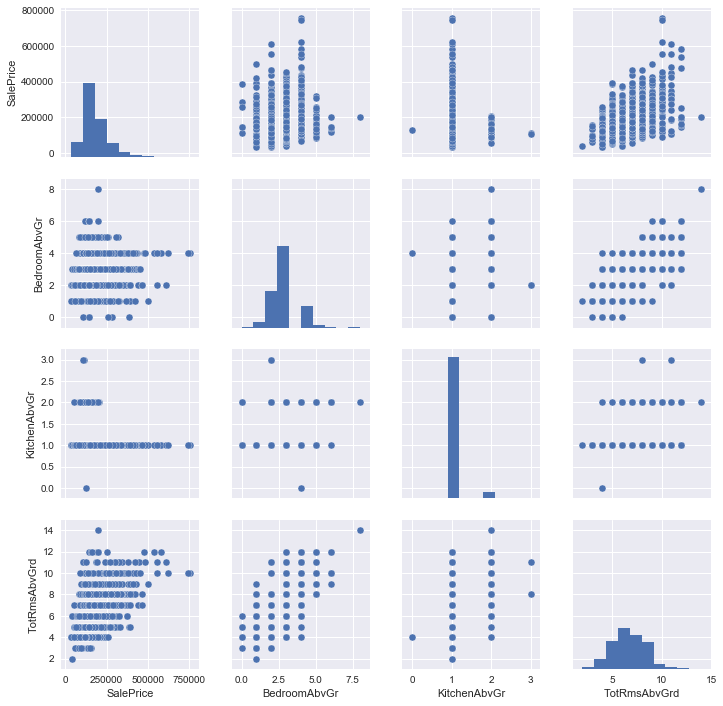

                 ---------------- ['Fireplaces', 'GarageYrBlt', 'GarageCars'] ---------------------


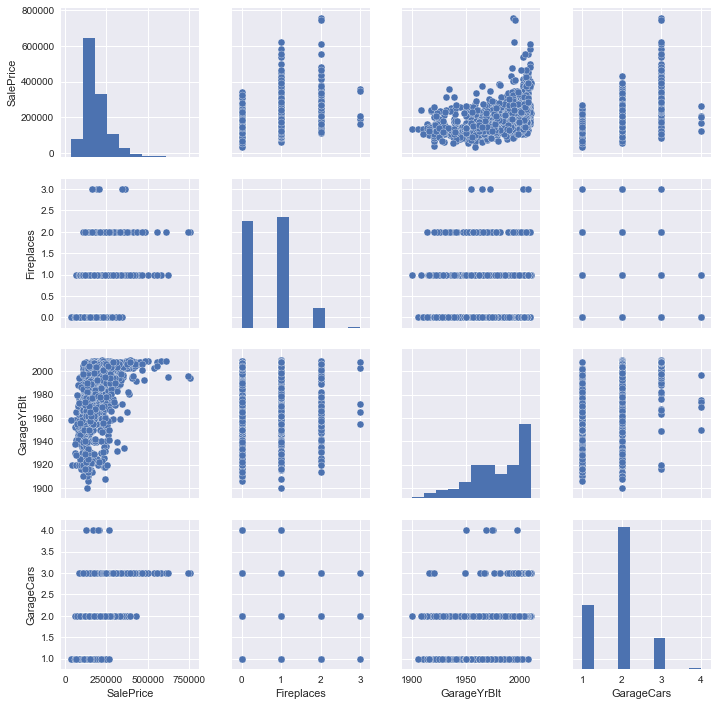

                 ---------------- ['GarageArea', 'WoodDeckSF', 'OpenPorchSF'] ---------------------


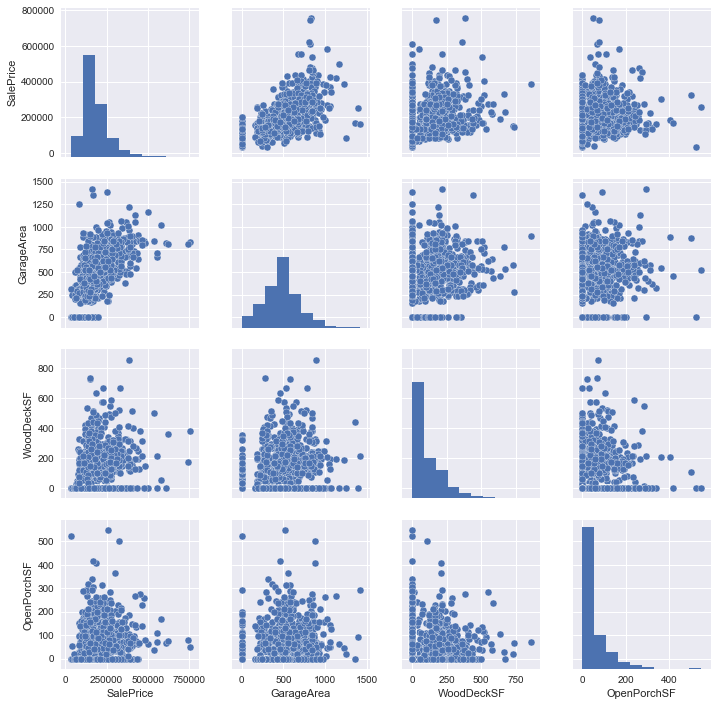

                 ---------------- ['EnclosedPorch', '3SsnPorch', 'ScreenPorch'] ---------------------


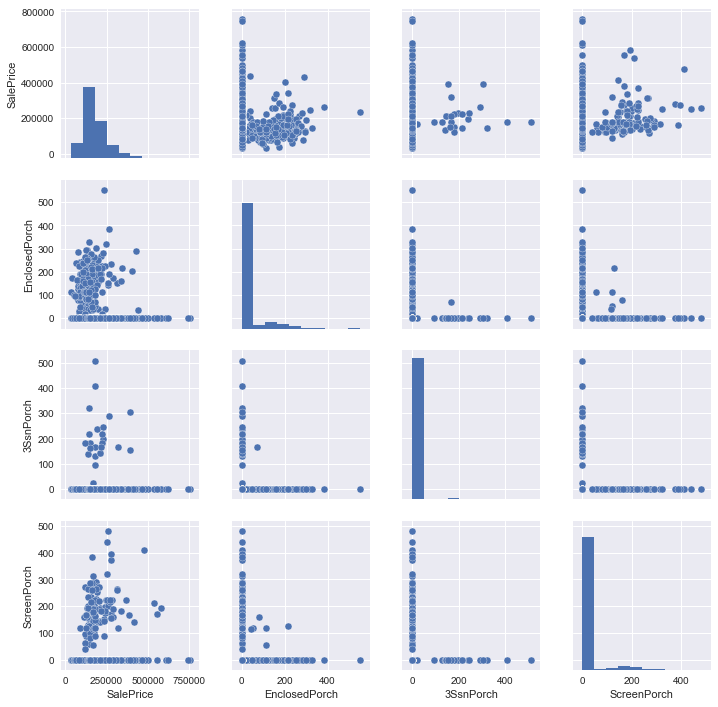

                 ---------------- ['PoolArea', 'MiscVal', 'MoSold'] ---------------------


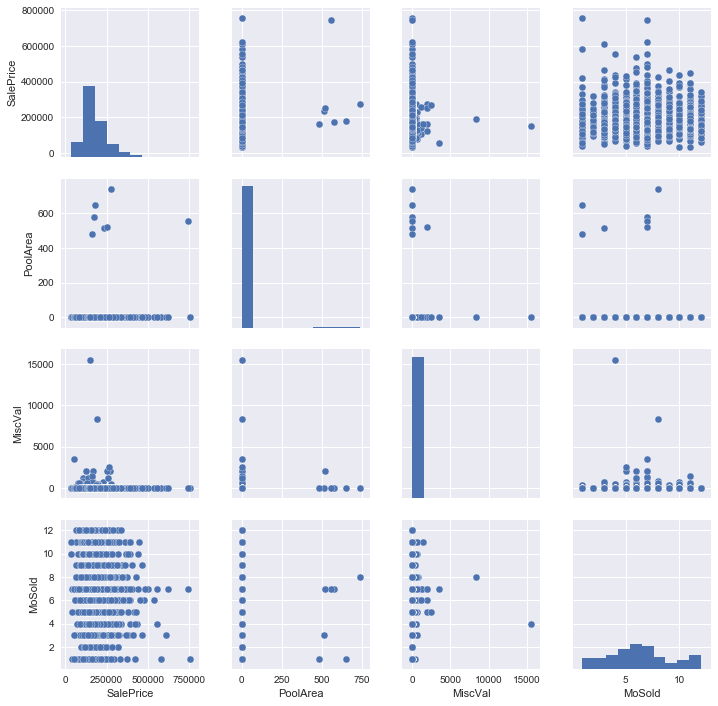

                 ---------------- ['YrSold', 'SalePrice'] ---------------------


ValueError: x and y must be the same size

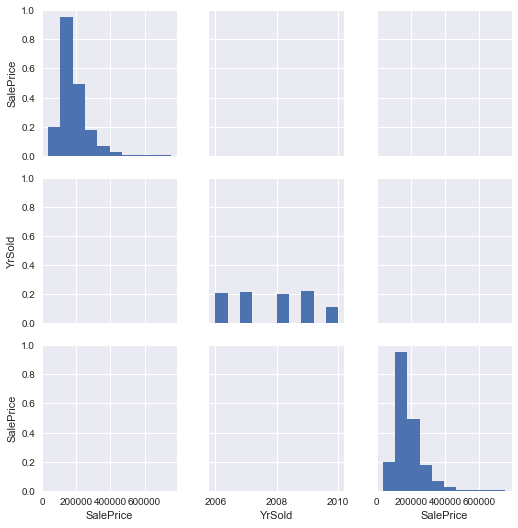

In [239]:
for i in range(0,len(numeric_cols), 3):
    print('                 ----------------', numeric_cols[i:i+3], '---------------------')
    cols = ['SalePrice'] + numeric_cols[i:i+3]
    sns.pairplot(train_df[cols].dropna())
    plt.show()

In [197]:
for col in numeric_cols:
    print(col)
    print(train_df[col].describe())
    print(train_df[col].isnull().sum())

MSSubClass
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
0
LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
259
LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
0
OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
0
OverallCond
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%        

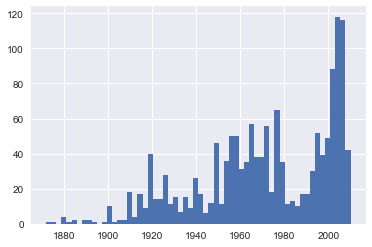

In [156]:
train_df.YearBuilt.hist(bins = 60)
plt.show()

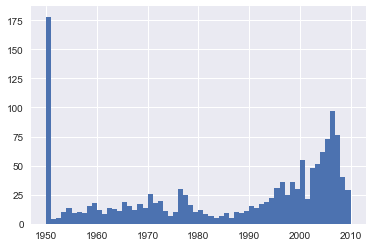

In [157]:
train_df.YearRemodAdd.hist(bins = 60)
plt.show()

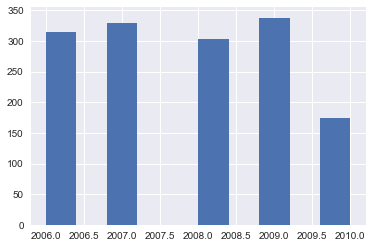

In [158]:
train_df.YrSold.hist()
plt.show()

# Attempting correlation matrix

In [269]:
# compute the correlation matrix
corr = train_df.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [270]:
#check to see if any cat columns are in corr
for col in cat_cols:
    print(col, 'is in corr.columns----', col in corr.columns)

MSZoning is in corr.columns---- False
Street is in corr.columns---- False
Alley is in corr.columns---- False
LotShape is in corr.columns---- False
LandContour is in corr.columns---- False
Utilities is in corr.columns---- False
LotConfig is in corr.columns---- False
LandSlope is in corr.columns---- False
Neighborhood is in corr.columns---- False
Condition1 is in corr.columns---- False
Condition2 is in corr.columns---- False
BldgType is in corr.columns---- False
HouseStyle is in corr.columns---- False
RoofStyle is in corr.columns---- False
RoofMatl is in corr.columns---- False
Exterior1st is in corr.columns---- False
Exterior2nd is in corr.columns---- False
MasVnrType is in corr.columns---- False
ExterQual is in corr.columns---- False
ExterCond is in corr.columns---- False
Foundation is in corr.columns---- False
BsmtQual is in corr.columns---- False
BsmtCond is in corr.columns---- False
BsmtExposure is in corr.columns---- False
BsmtFinType1 is in corr.columns---- False
BsmtFinType2 is in

In [271]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [272]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]], dtype=bool)

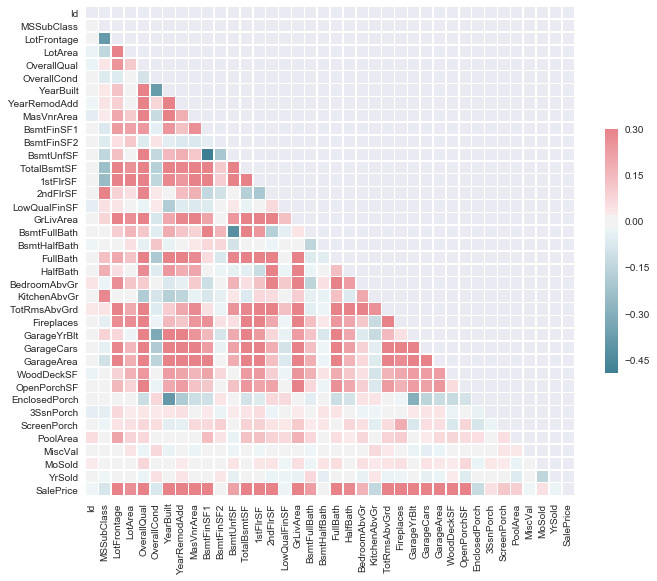

In [273]:
# set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3,
           center = 0, square = True, linewidth = 0.5, 
            cbar_kws = {'shrink': 0.5})
plt.show()

# linear_model for a single feature

In [425]:
#pre inspection before assignment of X
train_df.OverallQual[0:5].values

array([7, 6, 7, 7, 8])

In [426]:
# pre-inspection before assignment of y
train_df.SalePrice[0:5].values

array([208500, 181500, 223500, 140000, 250000])

In [427]:
#instance of linear_model.LinearRegression
reg = linear_model.LinearRegression()

In [428]:
#assign X
X_OQ = train_df.OverallQual.values
type(X_OQ)

numpy.ndarray

In [429]:
# assign y
y = train_df.SalePrice.values

In [430]:
type(y)

numpy.ndarray

In [431]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [432]:
X_OQ

array([7, 6, 7, ..., 7, 5, 5])

In [433]:
#reshape the arrays from flat, to something 
#that looks like an array of arrays
y = y.reshape(-1, 1)
X_OQ = X_OQ.reshape(-1, 1)

In [435]:
X_OQ

array([[7],
       [6],
       [7],
       ..., 
       [7],
       [5],
       [5]])

In [434]:
y

array([[208500],
       [181500],
       [223500],
       ..., 
       [266500],
       [142125],
       [147500]])

In [436]:
y[0]

array([208500])

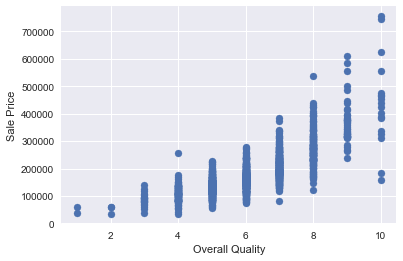

In [437]:
plt.scatter(X_OQ, y)
plt.ylabel('Sale Price')
plt.xlabel('Overall Quality')
plt.show()

In [367]:
# fit the regression model
reg.fit(X_OQ, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [368]:
prediction_space = np.linspace(min(X_OQ),
                              max(X_OQ)).reshape(-1, 1)

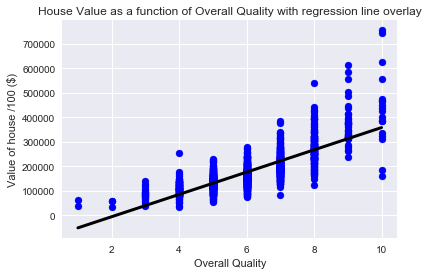

In [371]:
plt.scatter(X_OQ, y, color = 'blue')
plt.plot(prediction_space, reg.predict(prediction_space),
        color = 'black', linewidth = 3)
plt.ylabel('Value of house /100 ($)')
plt.xlabel('Overall Quality')
plt.title('House Value as a function of Overall Quality with regression line overlay')
plt.show()

# linear_model top 5 from corr

In [385]:
corr.SalePrice.sort_values(ascending = False)[0:6]

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

In [386]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [387]:
cols = ['Id','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
          'TotalBsmtSF', 'SalePrice']

In [388]:
reg_lin = linear_model.LinearRegression()

In [389]:
train_subset = train_df[cols]

In [421]:
X = train_subset.drop('SalePrice', axis = 1).values
#X = train_subset.drop('SalePrice', axis = 1)

In [424]:
X

array([[   1,    7, 1710,    2,  548,  856],
       [   2,    6, 1262,    2,  460, 1262],
       [   3,    7, 1786,    2,  608,  920],
       ..., 
       [1458,    7, 2340,    1,  252, 1152],
       [1459,    5, 1078,    1,  240, 1078],
       [1460,    5, 1256,    1,  276, 1256]])

In [422]:
####y = train_subset['SalePrice'].values
y = train_df_subset['SalePrice']

In [423]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [393]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, 
                                                    random_state = 42)

In [419]:
X_train

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
135,136,7,1682,2,530,1304
1452,1453,5,1072,2,525,547
762,763,7,1547,2,614,756
932,933,9,1905,3,788,1905
435,436,7,1661,2,550,799
629,630,6,1350,2,520,1248
1210,1211,6,1845,2,462,1055
1118,1119,5,1601,1,300,533
1084,1085,6,1498,2,409,691
158,159,7,1947,2,678,991


In [420]:
y_train

135     174000
1452    145000
762     215200
932     320000
435     212000
629     168500
1210    189000
1118    140000
1084    187500
158     254900
967     135000
1259    151000
551     112500
497     184000
1031    197000
1262    161500
1013     85000
1311    203000
566     325000
610     313000
1278    237000
1263    180500
816     137000
438      90350
940     150900
96      214000
560     121500
1182    745000
471     190000
1004    181000
         ...  
747     265979
252     173000
21      139400
1337     52500
459     110000
1184    186700
276     201000
955     145000
1215    125000
385     192000
805     227680
1437    394617
343     266000
769     538000
1332    100000
130     226000
871     200500
1123    118000
1396    160000
87      164500
330     119000
1238    142500
466     167000
121     100000
1044    278000
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1022, dtype: int64

In [411]:
reg_lin.fit(X_train,y_train)
#maybe we should resize these at some point?
# also maybe normalize the data?

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [412]:
y_pred = reg_lin.predict(X_train)
y_pred

array([ 221647.94347009,  124016.19273761,  200559.24682162, ...,
        124508.25124958,  176594.98422093,  233838.63454043])

In [413]:
mse = mean_squared_error(y_pred, y_train)
mse

1553824813.0432649

In [414]:
rmse = np.sqrt(mse)
rmse

39418.58461491565

In [415]:
msle = mean_squared_log_error(y_train, y_pred)
msle

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:314: RuntimeWarning: invalid value encountered in log
  return mean_squared_error(np.log(y_true + 1), np.log(y_pred + 1),


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [416]:
msle = mean_squared_log_error(float(y_train), float(y_pred))
msle

TypeError: cannot convert the series to <class 'float'>

In [417]:
y_train.shape

(1022,)

In [418]:
y_pred.shape

(1022,)